## Multiple Choices
1. D

2. D

In [62]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q1 Support Vector Machine

### Linear SVM

In [63]:
# 1) Load data.

X_and_Y = np.load('arrhythmia.npy')   # Load data from file.
np.random.shuffle(X_and_Y)    # Shuffle the data.
X = X_and_Y[:,0:-1]    # First column to second last column: Features (numerical values) 
Y = X_and_Y[:,-1]    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

(452, 279) (452,)


In [80]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)

X_train_val = X[:int(0.8*len(X)),:] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):,:] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(361, 279) (91, 279) (361,) (91,)


In [81]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

classifier = svm.SVC(kernel = 'linear')
C_list  = [10**(-6), 10**-5,10**-4,10**-3, 10**-2,10**-1] # Different C to try.
param_grid = {'C':C_list}
GSearch = GridSearchCV(classifier,param_grid, return_train_score = 'ture')
GSearch.fit(X_train_val, Y_train_val)  


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='ture',
       scoring=None, verbose=0)

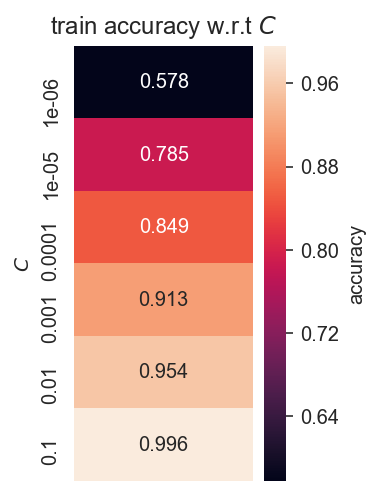

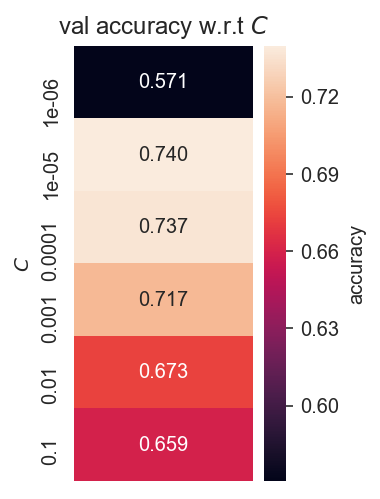

In [82]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

train_acc = GSearch.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

val_acc = GSearch.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [83]:
# 5) Use the best C to calculate the test accuracy.
test_acc = GSearch.score(X_test, Y_test)
print(test_acc)

0.7142857142857143


### SVM with RBF Kernel

In [84]:
# 1) Consider RBF kernel. Perform grid search for best C and gamma 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
classifier = svm.SVC(kernel = 'rbf')
C_list     = [0.1,1,10,100] # Different C to try.
gamma_list = [10**-7, 10**-6, 10**-5,10**-4] # Different gamma to try.
param_grid = {'C':C_list}
GSearch = GridSearchCV(classifier,param_grid, return_train_score = 'ture')
GSearch.fit(X_train_val, Y_train_val)  

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change fro

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='ture', scoring=None, verbose=0)

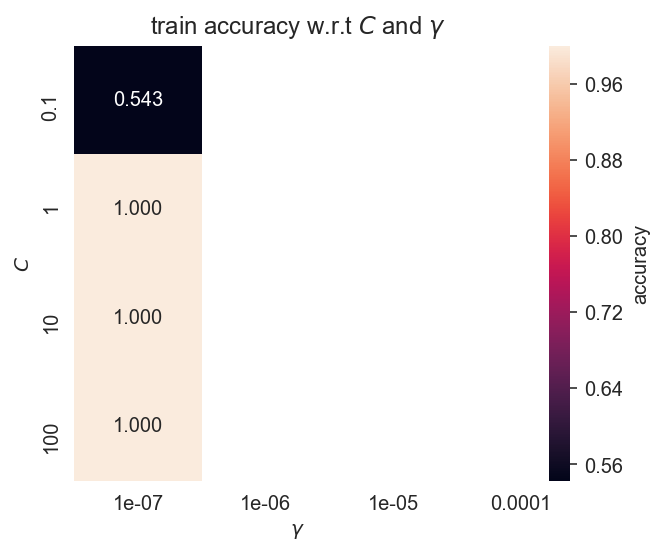

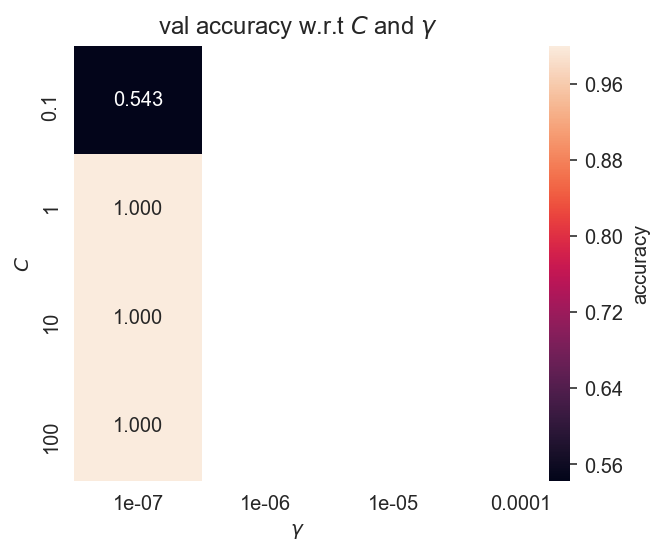

In [85]:
# 2) Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.

def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_RBF() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8, 0.7],
#                             [0.7, 0.9]])
# demo_C_list     = [0.1, 1]
# demo_gamma_list = [0.01, 0.1]
# draw_heatmap_RBF(demo_acc, 'demo accuracy', demo_gamma_list, demo_C_list)
#

train_acc = GSearch.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_RBF(train_acc, 'train accuracy', gamma_list, C_list)

val_acc = GSearch.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_RBF(val_acc, 'val accuracy',gamma_list, C_list)

In [86]:
# 3) Use the best C and gamma to calculate the test accuracy.

test_acc = GSearch.score(X_test, Y_test)
print(test_acc)

0.5384615384615384


### Re-implementation of Cross-validation and Grid Search 

In [96]:
# 1) Implement a simple cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold
    for i in range(fold):
        X_test = X_train_val[i*number:(i+1)*number,:]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        newSVM = svm.SVC(kernel = 'linear', C=C)
        newSVM.fit(X_train,Y_train)
        train_acc = newSVM.score(X_train,Y_train)
        val_acc = newSVM.score(X_test,Y_test)
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [97]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    gamma_list:  The list of gamma values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list), len(gamma_list))
    """
    val_acc_matrix   = np.zeros((len(C_list),1))
    train_acc_matrix = np.zeros((len(C_list),1))
    for i in range(len(C_list)):
        for j in range(len(gamma_list)):
            val_acc_matrix[i], train_acc_matrix[i]= simple_cross_validation(\
            X_train_val, Y_train_val, C_list[i],gamma_list[j],fold)
    return val_acc_matrix, train_acc_matrix

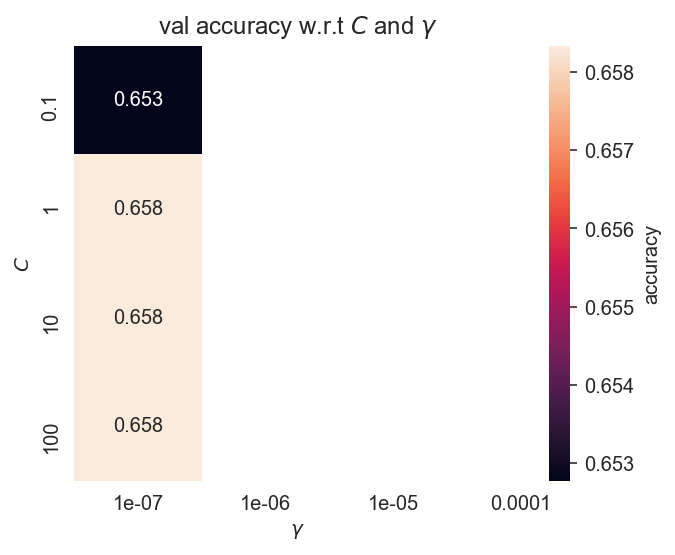

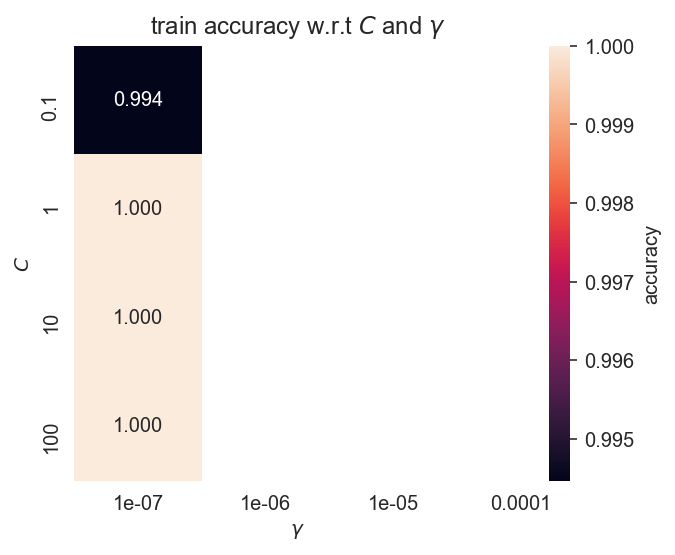

In [98]:
# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.

val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, 3)

draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

## 2.4 Implement Linear SVM